In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# anchor boxes
YOLO_ANCHORS = np.array(
    [(10, 13), (16, 30), (33, 23), 
     (30, 61), (62, 45), (59, 119),
     (116, 90), (156, 198), (373, 326)], np.float32) / 416

YOLO_ANCHORS_MASKS = np.array([[6, 7, 8], 
                               [3, 4, 5],
                               [0, 1, 2]]) 


YOLO_ANCHORS

array([[0.02403846, 0.03125   ],
       [0.03846154, 0.07211538],
       [0.07932692, 0.05528846],
       [0.07211538, 0.14663461],
       [0.14903846, 0.10817308],
       [0.14182693, 0.28605768],
       [0.27884614, 0.21634616],
       [0.375     , 0.47596154],
       [0.89663464, 0.78365386]], dtype=float32)

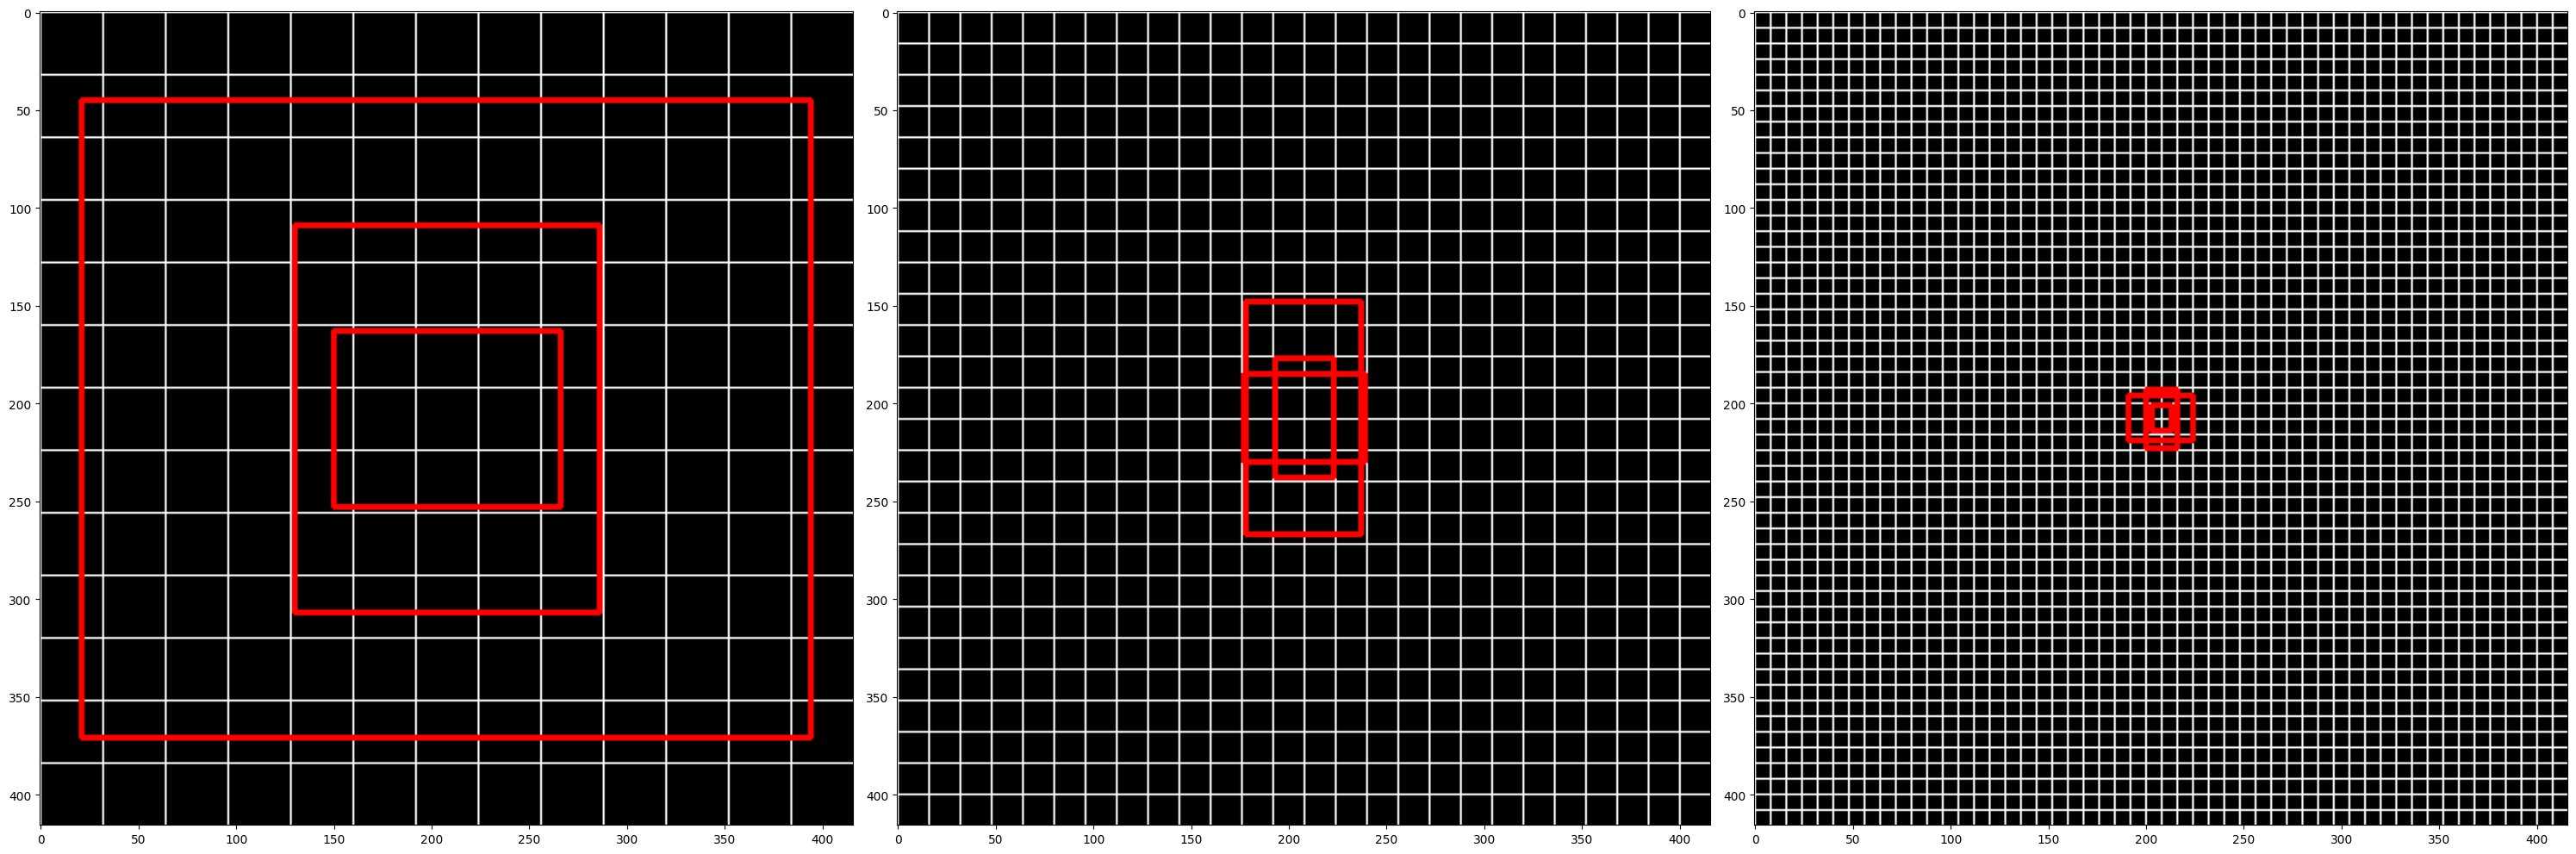

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 30))
f.subplots_adjust(hspace = .2, wspace = .05)
axs = (ax1, ax2, ax3)
    
for i, anchor_idxs in enumerate(YOLO_ANCHORS_MASKS):
    image = np.zeros((416, 416, 3), dtype=np.uint8)
    
    grid_size = 32 // pow(2, i)
    grid_color = [255, 255, 255] # (255,255,255)

    # Plot grid box
    dx, dy = (grid_size, grid_size)
    image[:,::dy,:] = grid_color
    image[::dx,:,:] = grid_color
    
    for idx in anchor_idxs:
        anchor = YOLO_ANCHORS[idx] * 416
        cx,cy= 208, 208
        anchor_maxes = (anchor / 2.)
        anchor_mins = -anchor_maxes

        left = int(cx + anchor_mins[0])
        top = int(cy + anchor_mins[1])
        right = int(cx + anchor_maxes[0])
        bottom = int(cy + anchor_maxes[1])

        cv2.rectangle(image, (left, top), (right, bottom), (255,0,0), 2)
    
    axs[i].imshow(image)
f.tight_layout()